In [2]:
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

# Display all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [10]:
df = pd.read_parquet('data/nhanes_data.parquet')
df.head()

,SEQN,Weight,Body mass index,Year Range,Systolic,Diastolic,Gender,Age,Diabetes,Glycohemoglobin,Cholesterol,High-density lipoprotein (HDL),Albumin,Alanine aminotransferase (ALT),Aspartate aminotransferase (AST),Alkaline phosphatase (ALP),Gamma-glutamyl transferase (GGT),Glucose,Iron,Lactate dehydrogenase (LDH),Phosphorus,Bilirubin,Protein,Triglycerides,Uric acid,Creatinine,White blood cells,Basophils,Red blood cells,Hemoglobin,Red blood cell width,Platelet count,Mean volume of platelets,Coronary heart disease,Blood related diabetes,Blood related stroke,Moderate-work,Vigorous-work
0,1.0,12.5,14.90,1999-2000,NaN,NaN,2.0,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,75.4,24.90,1999-2000,106.0,58.0,1.0,926.0,2.0,4.7,5.56,1.39,45.0,16.0,19.0,62.0,20.0,78.0,11.28,140.0,1.066,12.0,72.0,1.298,362.8,61.9,7.6,5.397605e-79,4.73,14.1,13.7,214.0,7.7,2.0,2.0,2.0,NaN,3.0
2,3.0,32.9,17.63,1999-2000,110.0,60.0,2.0,125.0,2.0,NaN,3.34,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,5.397605e-79,4.52,13.7,11.7,270.0,8.6,NaN,NaN,NaN,NaN,NaN
3,4.0,13.3,NaN,1999-2000,NaN,NaN,1.0,22.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.8,1.000000e-01,4.77,9.3,15.3,471.0,7.8,NaN,NaN,NaN,NaN,NaN
4,5.0,92.5,29.10,1999-2000,122.0,82.0,1.0,597.0,2.0,5.5,7.21,1.08,45.0,28.0,22.0,63.0,34.0,95.0,24.54,133.0,1.033,8.6,73.0,3.850,404.5,70.7,5.9,5.397605e-79,5.13,14.5,13.1,209.0,10.4,2.0,2.0,2.0,17.0,1.0


In [4]:
def printm(*args):
    text = " ".join(str(arg) for arg in args)
    display(Markdown(f"**{text}**"))

### Dataset Size

In [37]:
print(f'Shape of dataset:', df.shape)

Shape of dataset: (101316, 38)


### Data Types

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101316 entries, 0 to 9253
Data columns (total 38 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SEQN                              101316 non-null  float64
 1   Weight                            3881 non-null    float64
 2   Body mass index                   87799 non-null   float64
 3   Year Range                        101316 non-null  object 
 4   Systolic                          68576 non-null   float64
 5   Diastolic                         68576 non-null   float64
 6   Gender                            101316 non-null  float64
 7   Age                               63085 non-null   float64
 8   Diabetes                          96802 non-null   float64
 9   Glycohemoglobin                   58503 non-null   float64
 10  Cholesterol                       74689 non-null   float64
 11  High-density lipoprotein (HDL)    74684 non-null   float64


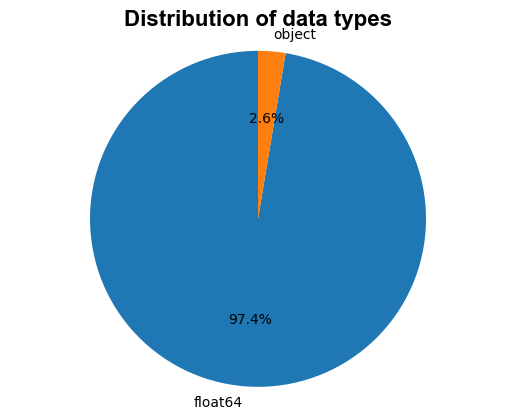

In [39]:
dtypes = {}
for col in df.columns:
    col_dtype = df[col].dtype.name
    dtypes[col_dtype] = dtypes.get(col_dtype, 0) + 1

values = list(dtypes.values())
labels = list(dtypes.keys())


plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of data types', fontsize=16, fontweight='bold', color='black', fontname='Arial')
plt.show()

### Missing Values

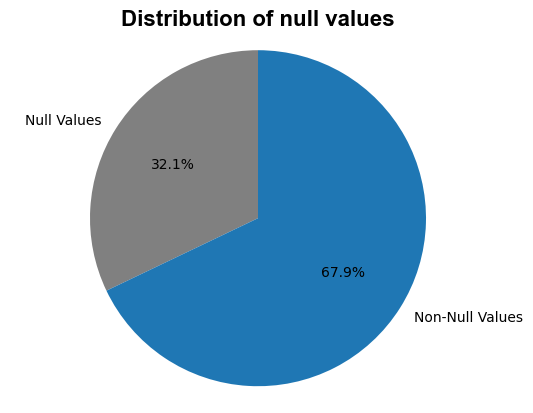

In [40]:
values = [df.isnull().sum().sum(), df.notnull().sum().sum()]
labels = ['Null Values', 'Non-Null Values']
colors = ['grey', 'C0']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')
plt.title('Distribution of null values', fontsize=16, fontweight='bold', color='black', fontname='Arial')
plt.show()

In [15]:
# null_counts = df.isnull().sum()
# non_null_counts = df.notnull().sum()
# null_counts / (null_counts + non_null_counts) * 100

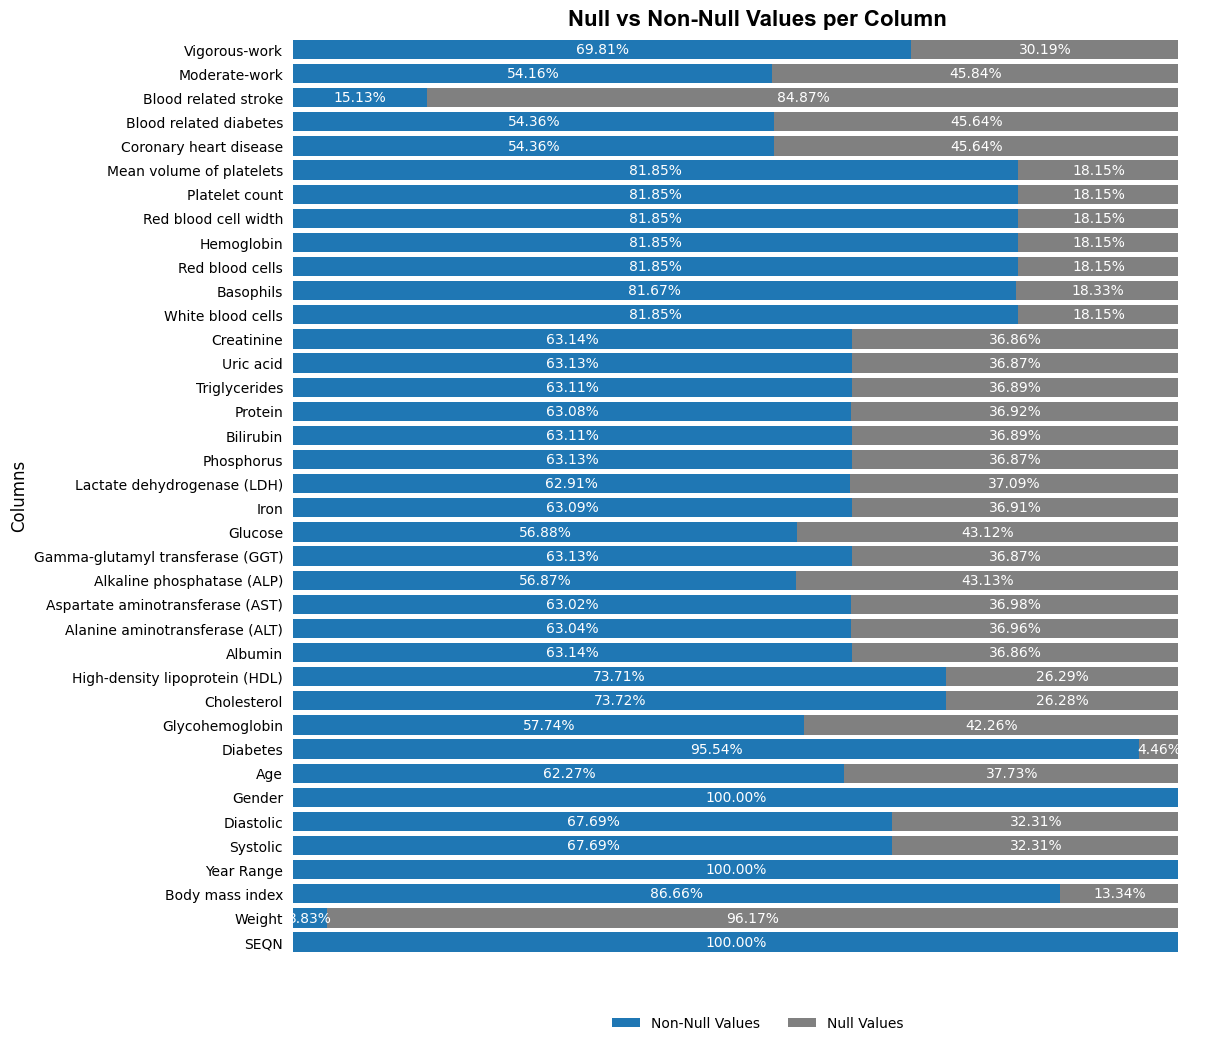

In [41]:
# Calculate null and non-null values
null_counts = df.isnull().sum()  # Count of null values
non_null_counts = df.notnull().sum()  # Count of non-null values

# Create a DataFrame for plotting
null_counts_df = pd.DataFrame({
    'Non-Null Values': non_null_counts,
    'Null Values': null_counts,
})

totals = null_counts_df.sum(axis=1)
percent = null_counts_df.div(totals, axis=0).mul(100).round(2)

ax = percent.plot(
    kind='barh', 
    stacked=True, 
    figsize=(12, 12), 
    color=['C0', 'grey'], 
    width=0.8,
    mark_right=True, 
    xticks=[]
)

plt.title('Null vs Non-Null Values per Column', fontsize=16, fontweight='bold', color='black', fontname='Arial')
plt.ylabel('Columns', fontsize=12)

ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

df_totals = null_counts_df['Non-Null Values'] + null_counts_df['Null Values']
df_rels =  null_counts_df[null_counts_df.columns[1:]].div(df_totals, 0)*100

for c in ax.containers:
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')
        
# Show the plot
plt.show()


### <span style="color: orange;"> Note: Since we only care about analyzing CHD, we are only going to consider the dataset where CHD is not null going forward</span>


In [11]:
print(f'shape before:', df.shape)
df = df[~df['Coronary heart disease'].isnull()]
print(f'shape after:', df.shape)

shape before: (101316, 38)
shape after: (55078, 38)


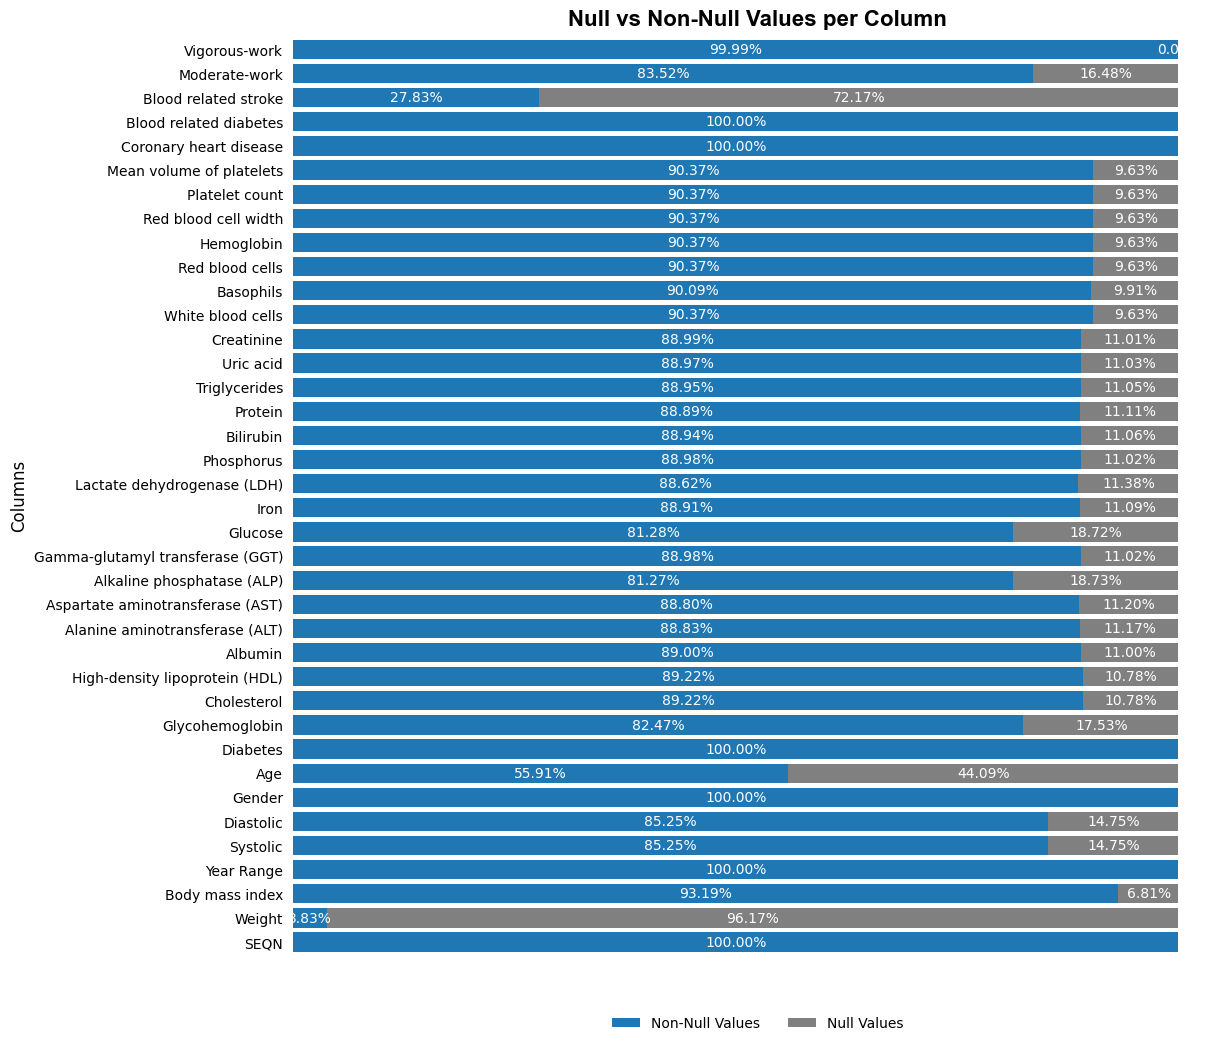

In [43]:
# Calculate null and non-null values
null_counts = df.isnull().sum()  # Count of null values
non_null_counts = df.notnull().sum()  # Count of non-null values

# Create a DataFrame for plotting
null_counts_df = pd.DataFrame({
    'Non-Null Values': non_null_counts,
    'Null Values': null_counts,
})

totals = null_counts_df.sum(axis=1)
percent = null_counts_df.div(totals, axis=0).mul(100).round(2)

ax = percent.plot(
    kind='barh', 
    stacked=True, 
    figsize=(12, 12), 
    color=['C0', 'grey'], 
    width=0.8,
    mark_right=True, 
    xticks=[]
)

plt.title('Null vs Non-Null Values per Column', fontsize=16, fontweight='bold', color='black', fontname='Arial')
plt.ylabel('Columns', fontsize=12)

ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

df_totals = null_counts_df['Non-Null Values'] + null_counts_df['Null Values']
df_rels =  null_counts_df[null_counts_df.columns[1:]].div(df_totals, 0)*100

for c in ax.containers:
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')
        
# Show the plot
plt.show()


In [76]:
df['Coronary heart disease'].value_counts()

Coronary heart disease
2.0    52463
1.0     2351
9.0      259
7.0        5
Name: count, dtype: int64

In [ ]:
# # Calculate null and non-null values
# null_counts = df.isnull().sum()  # Count of null values
# non_null_counts = df.notnull().sum()  # Count of non-null values

# # Create a DataFrame for plotting
# null_counts_df = pd.DataFrame({
#     'Non-Null Values': non_null_counts,
#     'Null Values': null_counts,
# })

# totals = null_counts_df.sum(axis=1)
# percent = null_counts_df.div(totals, axis=0).mul(100).round(2)

# ax = percent.plot(
#     kind='barh', 
#     stacked=True, 
#     figsize=(12, 12), 
#     color=['C0', 'grey'], 
#     width=0.8,
#     mark_right=True, 
#     xticks=[]
# )

# plt.title('Null vs Non-Null Values per Column', fontsize=16, fontweight='bold', color='black', fontname='Arial')
# plt.ylabel('Columns', fontsize=12)

# ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
# ax.tick_params(left=False, bottom=False)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

# df_totals = null_counts_df['Non-Null Values'] + null_counts_df['Null Values']
# df_rels =  null_counts_df[null_counts_df.columns[1:]].div(df_totals, 0)*100

# for c in ax.containers:
#     labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')
        
# # Show the plot
# plt.show()


### Duplicates

In [45]:
# Count the number of duplicate rows (excluding the first occurrence)
duplicate_count = df.duplicated().sum()

# Count the number of all duplicate rows (including the first occurrence)
all_duplicates_count = df[df.duplicated(keep=False)].shape[0]

print(f'Number of duplicate rows (excluding the first occurrence): {duplicate_count}')
print(f'Number of all duplicate rows (including the first occurrence): {all_duplicates_count}')

Number of duplicate rows (excluding the first occurrence): 0
Number of all duplicate rows (including the first occurrence): 0


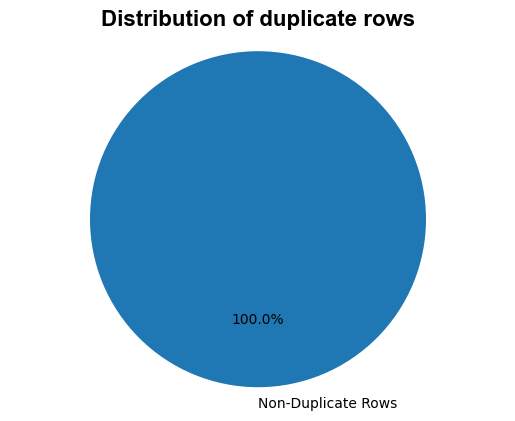

In [46]:
# values = [df.duplicated().sum().sum(), df.shape[0] - df.duplicated().sum().sum()]
# labels = ['Duplicate Rows', 'Non-Duplicate Rows']
# colors = ['grey', 'C0']

values = [df.shape[0] - df.duplicated().sum().sum()]
labels = ['Non-Duplicate Rows']
colors = ['C0']

plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  
plt.title('Distribution of duplicate rows', fontsize=16, fontweight='bold', color='black', fontname='Arial')
plt.show()

C:\Users\prsal\AppData\Local\Temp\ipykernel_31836\3723994947.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)


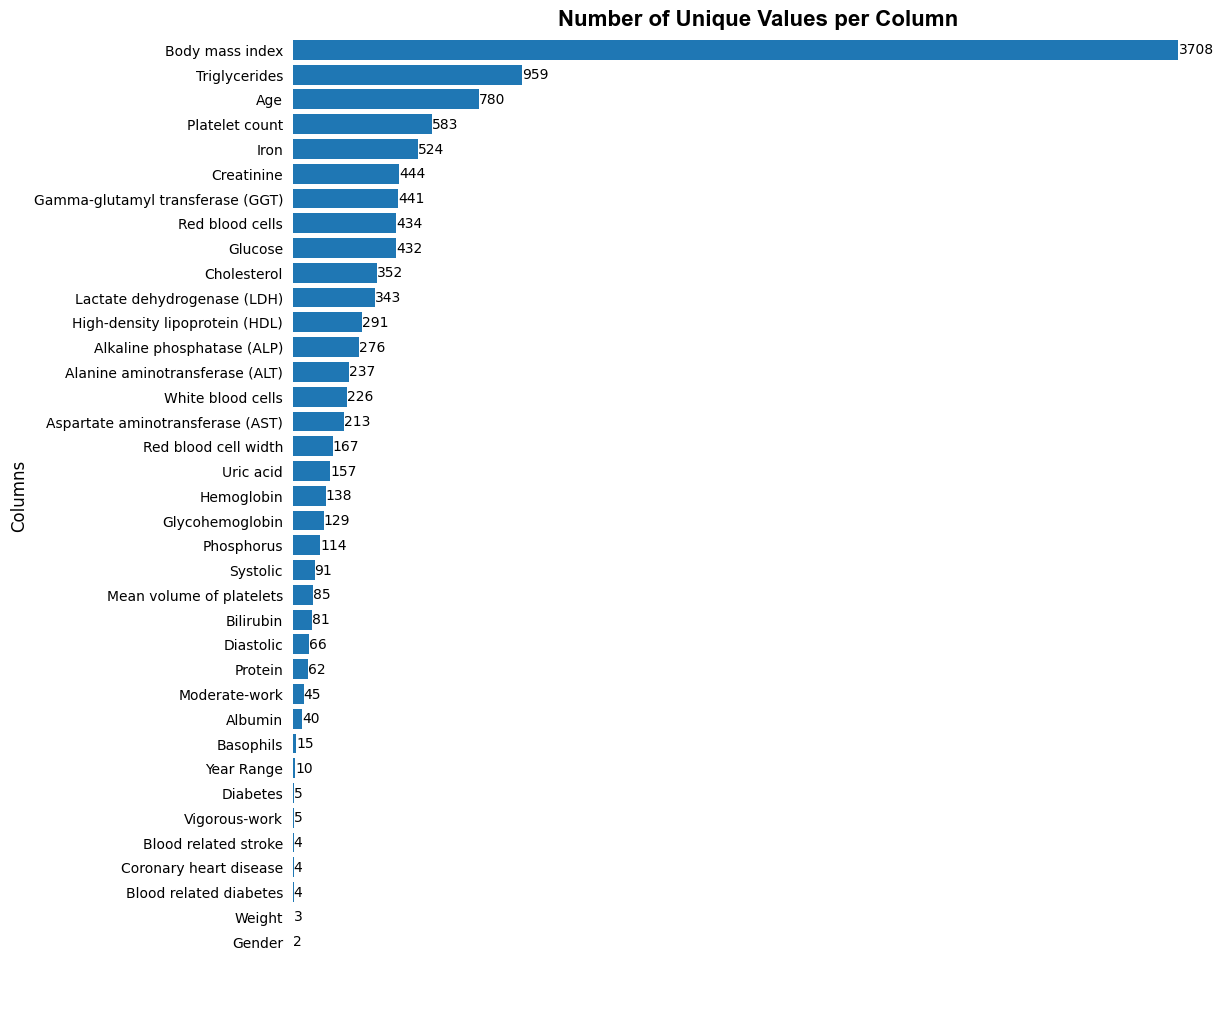

In [71]:
nuniques = pd.Series({col:df[col].nunique() for col in df.columns if col != 'SEQN'}).sort_values()

ax = nuniques.plot(
    kind='barh', 
    # stacked=True, 
    figsize=(12, 12), 
    # color=['C0', 'grey'], 
    width=0.8,
    mark_right=True, 
    xticks=[]
)

plt.title('Number of Unique Values per Column', fontsize=16, fontweight='bold', color='black', fontname='Arial')
plt.ylabel('Columns', fontsize=12)

ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)        

# Annotate each bar with the total
for bar in ax.patches:
    # Get the width of the bar (the value of each bar)
    bar_width = bar.get_width()
    # Place the text at the end of the bar
    ax.text(
        bar_width,  # X-coordinate
        bar.get_y() + bar.get_height() / 2,  # Y-coordinate, centered on the bar
        f'{bar_width}',  # Text to display
        va='center',  # Vertical alignment
        ha='left',  # Horizontal alignment
        fontsize=10  # Font size
    )


# Show the plot
plt.show()

### Outliers

C:\Users\prsal\AppData\Local\Temp\ipykernel_37328\4250423843.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


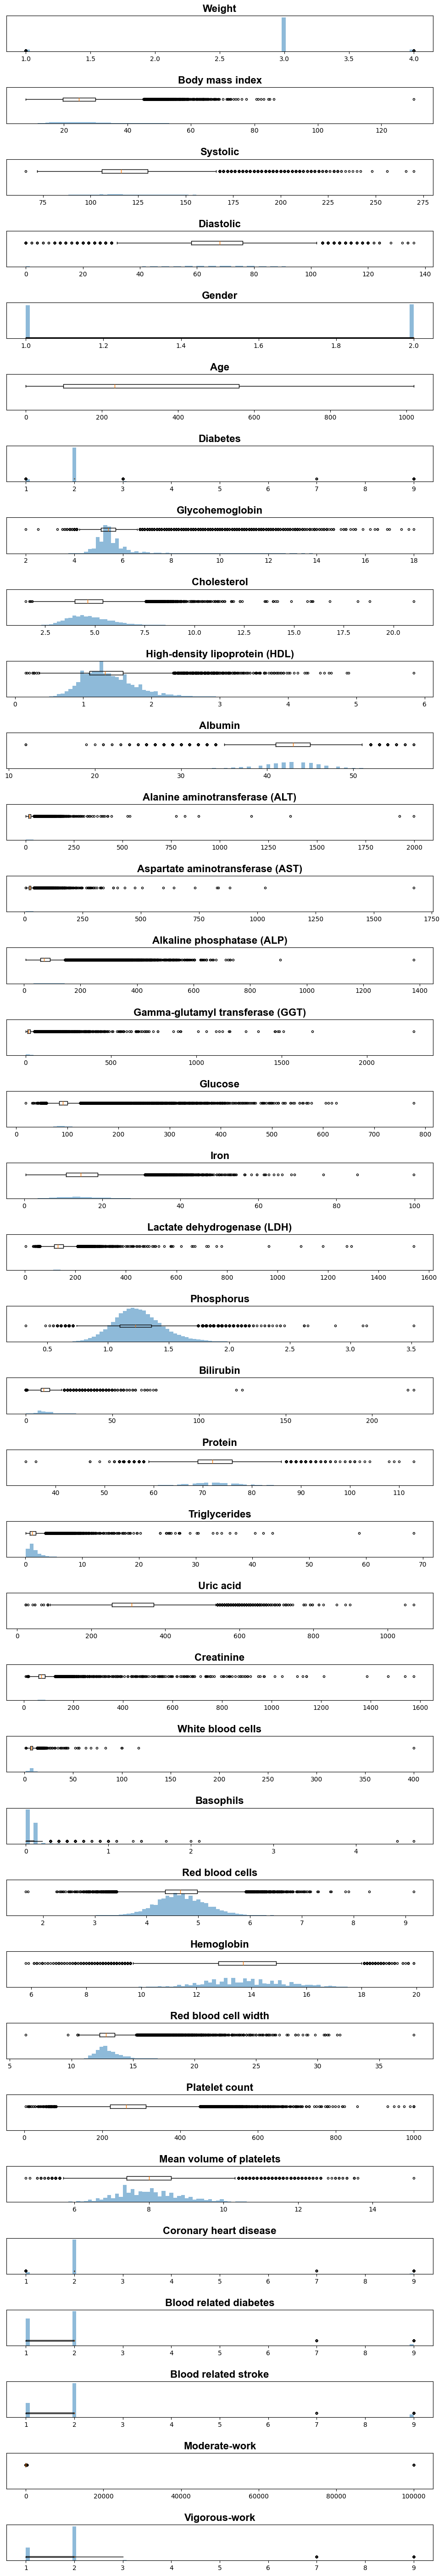

In [73]:
plot_df = df[[col for col in df.columns if col not in ('SEQN', 'Year Range')]]
fig, axs = plt.subplots(plot_df.shape[1], 1, figsize=(12, plot_df.shape[1]*2))

for i, col in enumerate(plot_df.columns):
    axs[i].hist(plot_df[col].dropna(), 
        bins=100, 
        alpha=0.5,
        color='C0', 
        density=True
    )
    axs[i].boxplot(
        plot_df[col].dropna(), 
        vert=False,
        flierprops=dict(marker='o', color='r', markersize=3)
    )
    axs[i].set_title(col, fontsize=16, fontweight='bold', color='black', fontname='Arial')
    axs[i].set_yticks([])  # This hides the ticks
    axs[i].set_yticklabels([])

plt.subplots_adjust(hspace=1)

fig.show()


### Incorrect Values
(according to SMEs)

In [22]:
# resort to extracted codebook to validate values
codebook_df = pd.read_csv('data/codebook.csv')
codebook_df.head()


,year_range,attribute,attribute_name,description,is_range,start_range_value,end_range_value,single_value
0,1999-2000,RIAGENDR,Gender,Male,False,NaN,NaN,1.0
1,1999-2000,RIAGENDR,Gender,Female,False,NaN,NaN,2.0
2,1999-2000,RIDAGEMN,Age,Range of Values,True,0.0,1019.0,NaN
3,1999-2000,BPXSY1,Systolic,Range of Values,True,74.0,242.0,NaN
4,1999-2000,BPXDI1,Diastolic,Range of Values,True,0.0,132.0,NaN


In [19]:
codebook_df[codebook_df['attribute_name'] == 'Weight']

,year_range,attribute,attribute_name,description,is_range,start_range_value,end_range_value,acceptable_values
5,1999-2000,BMXWT,Weight,Range of Values,True,3.1,193.3,NaN
75,2001-2002,BMXWT,Weight,Range of Values,True,3.3,196.8,NaN
132,2003-2004,BMXWT,Weight,Range of Values,True,2.4,209.1,NaN
188,2005-2006,BMXWT,Weight,Range of Values,True,2.6,371.0,NaN
241,2007-2008,BMXWT,Weight,Range of Values,True,3.1,218.2,NaN
293,2009-2010,BMXWT,Weight,Range of Values,True,2.7,239.4,NaN
387,2013-2014,BMXWT,Weight,Range of Values,True,3.1,222.6,NaN
431,2015-2016,BMXWT,Weight,Range of Values,True,3.6,198.9,NaN
503,2017-2018,BMXWT,Weight,Range of Values,True,3.2,242.6,NaN


In [ ]:
full_mask = np.full(len(df), False)
for col in df.columns:
    if col in ('SEQN', 'Year Range'):
            continue
    
    mask = np.full(len(df), False)
    print(f'Validating values for col: <{col}>')
    for year_range in df['Year Range'].unique():
        col_codebook = codebook_df[(codebook_df['year_range'] == year_range) &
                                   (codebook_df['attribute_name'] == col)]
        
        year_range_df = df[df['Year Range'] == year_range]
        year_range_mask = np.full(len(year_range_df), False)
        
        if not len(col_codebook):
            print(f'[ERROR] trying to find codebook for {year_range} <{col}> ({len(year_range_df)} values)')
            continue

        for index, row in col_codebook.iterrows():
            if row['is_range']:
                mask |= ((df['Year Range'] == year_range) & \
                    (((df[col] >= row['start_range_value']) & (df[col] <= row['end_range_value'])) | \
                     (df[col].isna())))
                year_range_mask |= (((year_range_df[col] >= row['start_range_value']) & \
                         (year_range_df[col] <= row['end_range_value']))| \
                          (year_range_df[col].isna()))
            else:
                mask |= ((df['Year Range'] == year_range) & \
                         ((df[col] == row['single_value']) | \
                          (df[col].isna())))
                year_range_mask |= ((year_range_df[col] == row['single_value']) | \
                          (year_range_df[col].isna()))

        print(f' - Num outside acceptable values for year range {year_range}: ', len(year_range_df[~year_range_mask]))
        # display(col_codebook)
    print(f' - Total num outside acceptable values: ', len(df[~mask]))
    print()
    full_mask &= mask

Validating values for col: <Weight>
 - Num outside acceptable values for year range 1999-2000:  0
 - Num outside acceptable values for year range 2001-2002:  0
 - Num outside acceptable values for year range 2003-2004:  0
 - Num outside acceptable values for year range 2005-2006:  0
 - Num outside acceptable values for year range 2007-2008:  0
 - Num outside acceptable values for year range 2009-2010:  0
[ERROR] trying to find codebook for 2011-2012 <Weight> (5559 values)
 - Num outside acceptable values for year range 2013-2014:  0
 - Num outside acceptable values for year range 2015-2016:  0
 - Num outside acceptable values for year range 2017-2018:  0
 - Total num outside acceptable values:  5559

Validating values for col: <Body mass index>
 - Num outside acceptable values for year range 1999-2000:  0
 - Num outside acceptable values for year range 2001-2002:  0
 - Num outside acceptable values for year range 2003-2004:  0
 - Num outside acceptable values for year range 2005-2006: 

In [47]:
df[full_mask].shape

(55078, 38)